In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.data load
# 2.x.data(input 입력값), y data(target,label,class,y) divide
#         x :개개인의 의학정보(혈압,콜레스테롤....) => y: 양성암/음성암
#         x :개개인의 신용정보                       y: 대출가능성 여부
#         x :광고비, 수요자수, 경재수, 경재성장률      y: 매출성장률 (회귀분석)
# 3.preprocessing - 결측치, 이상치
# 4.eda - 시간화, 통계분석, 데이터분석
# 5.train data(모델 훈련시 사용), test data(훈련된 모델을 평가시 사용)
# 6.algorithm import (회귀분석, 군집분석, 분류분석)
# 7.algorithm.fit(train input data, train target data) - algorithm 훈련(학습)=>model
# 8.predictions = model.predict(test input data) - 모델이 테스트데이터를 예측해서 예측값을 리턴 
# 9.model 평가(predictions vs test target) => precision, recall, f1-score, roc_auc..
# 10.model optimization - gridsearch

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum().sum()

0

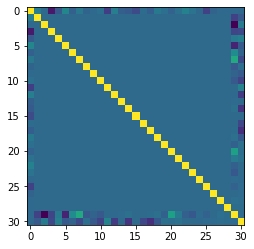

In [10]:
plt.imshow(df.corr())
pass

In [13]:
df.Class.value_counts() # imblanced dataset

0    284315
1       492
Name: Class, dtype: int64

<BarContainer object of 2 artists>

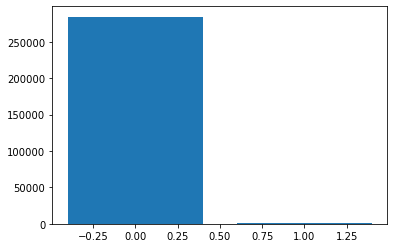

In [15]:
plt.bar(range(2), df.Class.value_counts())

In [17]:
df.drop('Time',axis=1, inplace=True)

In [18]:
y = df.Class
x = df.drop('Class',axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=111)

In [21]:
!pip install scikit-learn

In [25]:
from lightgbm import LGBMClassifier

In [26]:
lgb = LGBMClassifier()

In [27]:
lgb.fit(x_train,y_train)

LGBMClassifier()

In [28]:
preds = lgb.predict(x_test)

In [30]:
np.mean(preds == y_test)

0.9969102208489871

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
confusion_matrix(y_test,preds)

array([[85069,   221],
       [   43,   110]], dtype=int64)

In [39]:
lgb.score(x_test,y_test)

0.9969102208489871

In [41]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85112
           1       0.72      0.33      0.45       331

    accuracy                           1.00     85443
   macro avg       0.86      0.67      0.73     85443
weighted avg       1.00      1.00      1.00     85443



In [61]:
# outlier
# normal_length = percentile(x,75) - percentile(x,25)
# max_limit = x > percentile(x,75) + normal_length*1.5
# min_limit = x < percentile(x,25) + normal_length*1.5

In [79]:
def outlier(x):
    normal_list = []
    normal_length = np.percentile(x,75) - np.percentile(x,25)
    max_limit = np.percentile(x,75) - normal_length*1.5
    min_limit = np.percentile(x,25) - normal_length*1.5
    print(max_limit,min_limit)
    for i,j in enumerate(x):
        if min_limit < j < max_limit:
            normal_list.append(i)
    return normal_list

In [64]:
x = [1,2,3,4,2,3,5,4,3,2,2,3,4,5,4,3,-5000,1000,1000,-1000]
len(x)

20

In [80]:
outlier(x)

1.0 -1.0


[]

In [60]:
np.percentile(x_train,25)
np.percentile(x_train,75)

0.5208706692478395

In [45]:
# scaling - feature간의 scale의 크리를 동일하게 맞춘다

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaler.fit(x_train)
scaler_x_train = scaler.transform(x_train)
scaler_x_test = scaler.transform(x_test)

In [54]:
lgb = LGBMClassifier()
lgb.fit(scaler_x_train,y_train)
preds = lgb.predict(scaler_x_test)
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85117
           1       0.63      0.30      0.41       326

    accuracy                           1.00     85443
   macro avg       0.82      0.65      0.70     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
# 1번 (부도 경우)에 대해서 평가지표가 낮다 <= imbalanced data : 0번 데이터에 모델이 집중 학습됨

In [43]:
# imbalanced dataset을 학습시키는데 사용하는 기법
# 1. down sampling - 숫자가 많은 클래스의 데이터를 줄인다 => 정보손실이 크므로 사용하지 않는다
# 2. up sampling - 숫자가 적은 클래스의 데이터를 늘린다 

In [44]:
# up sampling 
#=> smote라는 기법을 통해 적은 수의 데이터를 늘린다.
#=> 단순 복제해서 늘리는 것이 아니라 수학적 계산을 통해서 원본데이터에 변형을 가해서 유사한 새로운 데이터 생성

In [78]:
from imblearn.over_sampling import SMOTE